In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('diamonds.csv', index_col='Unnamed: 0')

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.price.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
13550      1
13014      1
6811       1
5354       1
11600      1
Name: price, Length: 11602, dtype: int64

In [7]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [15]:
df.cut.value_counts(), df.color.value_counts()

(Ideal        21551
 Premium      13791
 Very Good    12082
 Good          4906
 Fair          1610
 Name: cut, dtype: int64, G    11292
 E     9797
 F     9542
 H     8304
 D     6775
 I     5422
 J     2808
 Name: color, dtype: int64)

In [3]:
features = [col for col in df.columns if col != 'price']
X = df.loc[:, features]
y = df.loc[:, 'price']

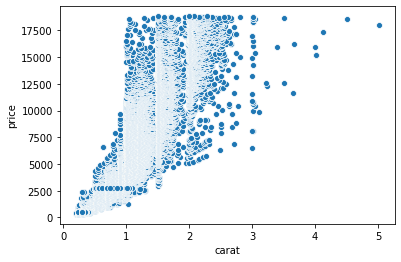

In [5]:
sns.scatterplot(x = df.carat, y = df.price, hue = );

In [35]:
features

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

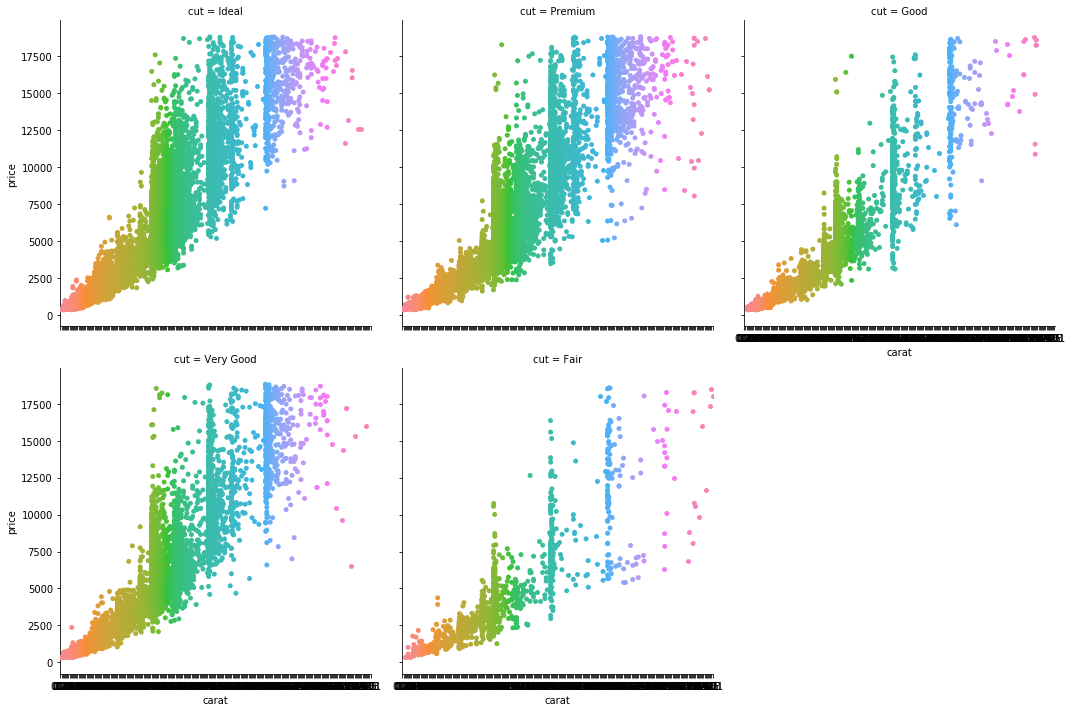

In [25]:
sns.catplot(data=df, x="carat", y="price", col="cut", col_wrap=3);

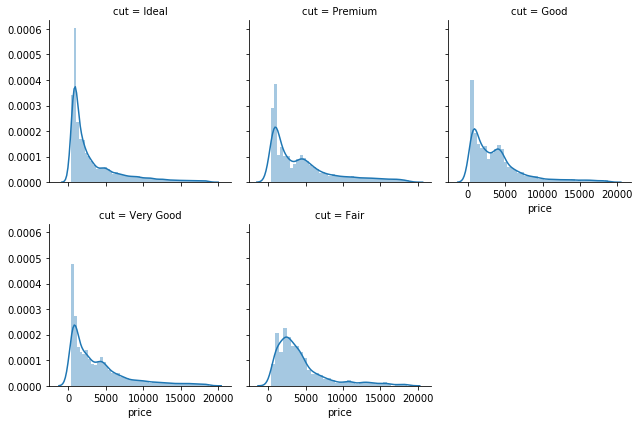

In [29]:
g = sns.FacetGrid(df, col="cut", col_wrap=3) 
g.map(sns.distplot, "price");

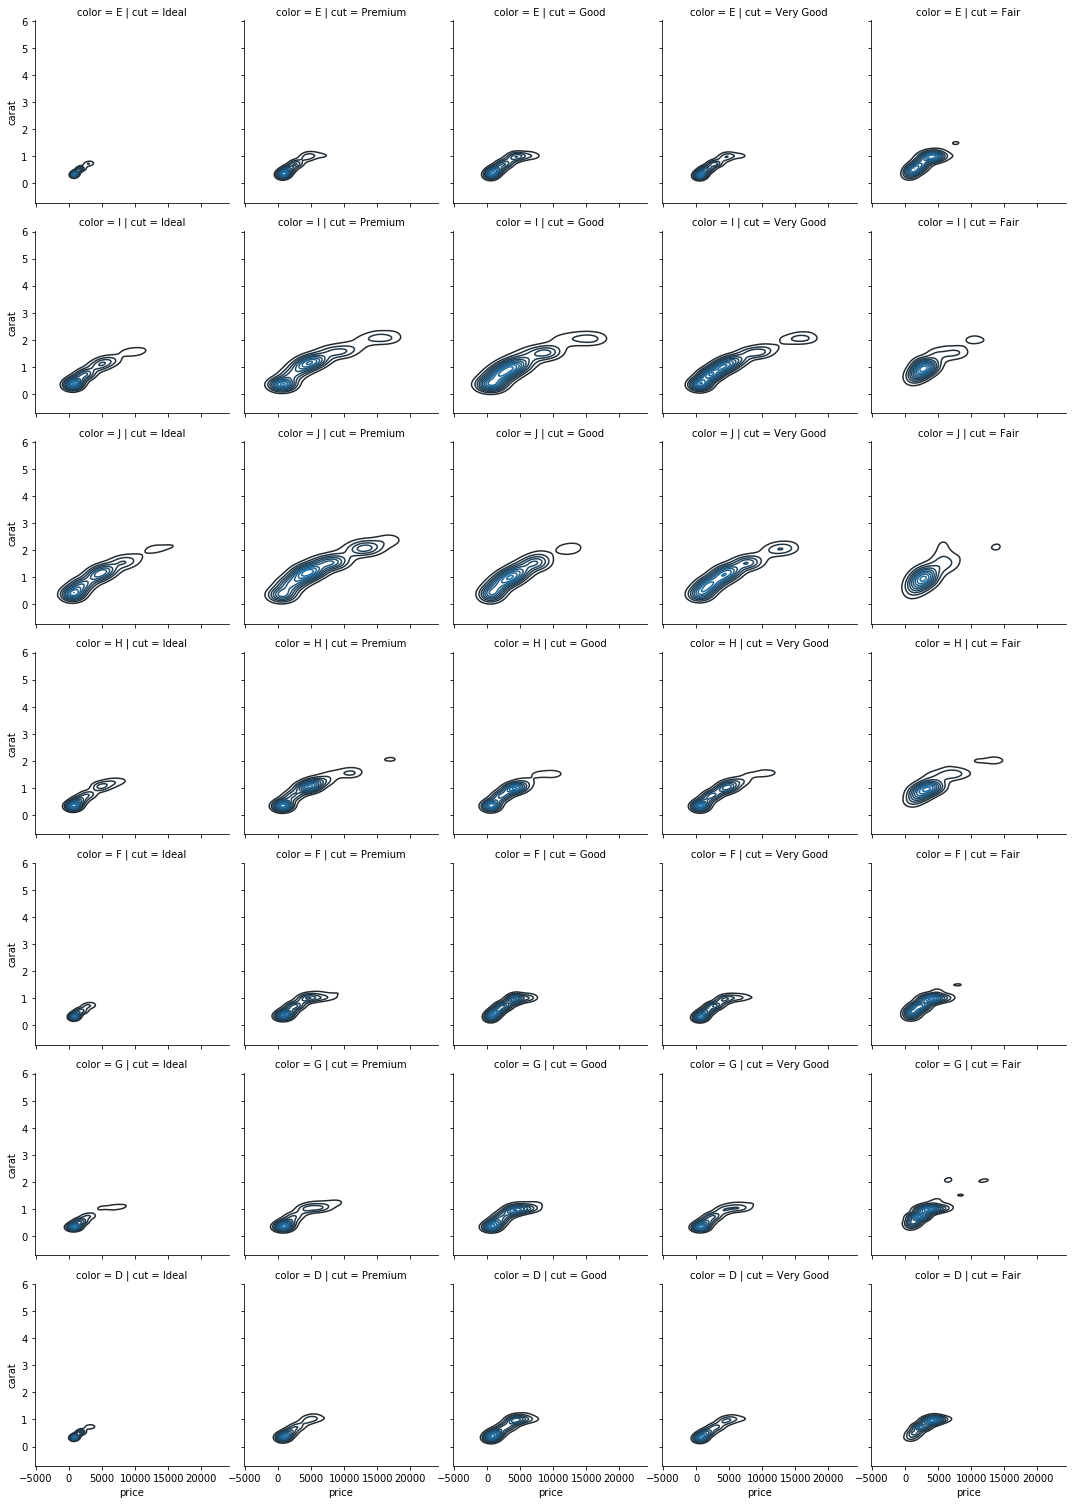

In [30]:
g = sns.FacetGrid(df, col="cut", row="color") 
g.map(sns.kdeplot, "price", "carat")

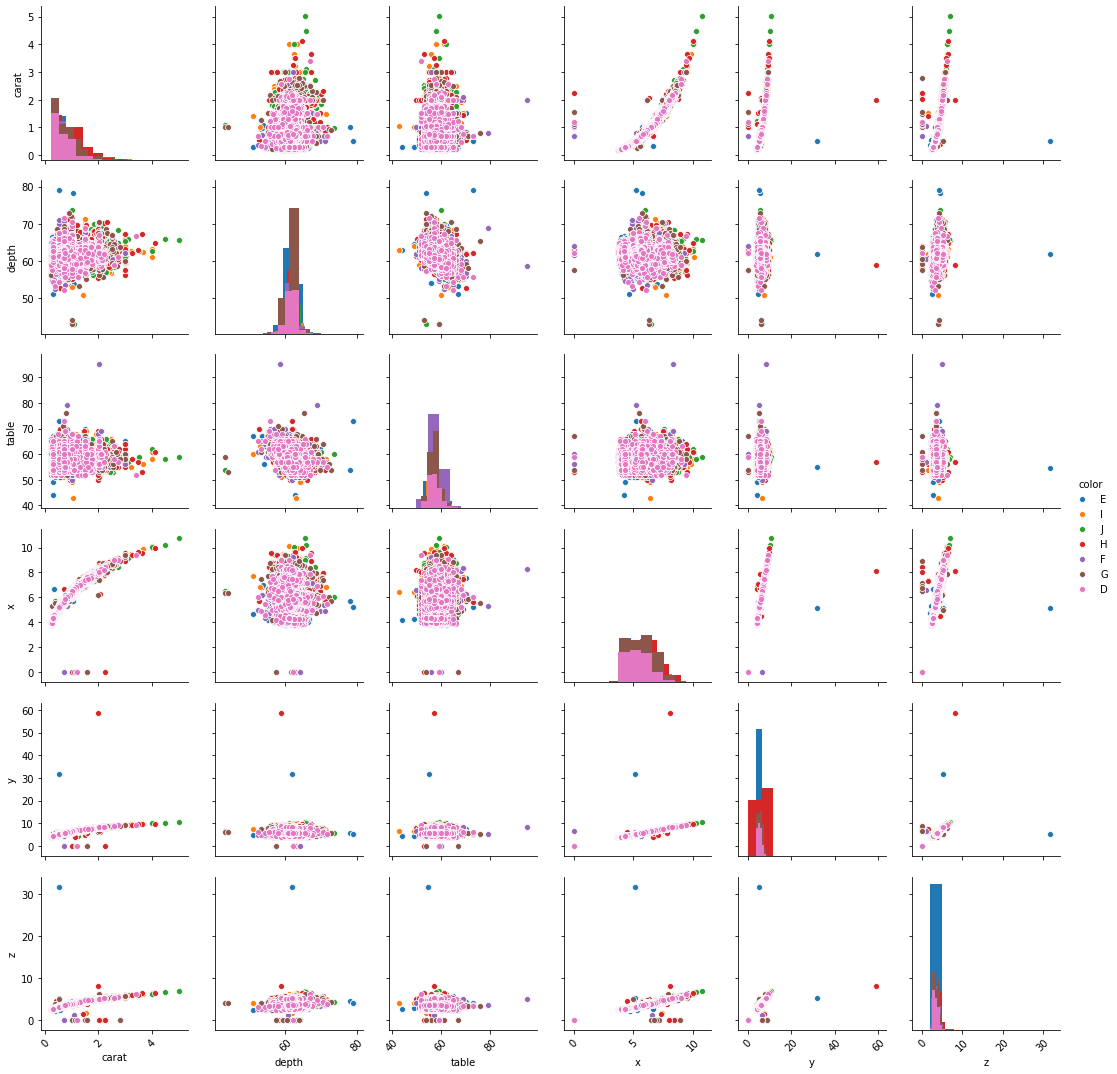

In [34]:
g = sns.pairplot(X, hue="color", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [46]:

def dist_subplots(nrow, ncol, data, columns, yticks=[]):
    sns.set(style="white", palette="muted", color_codes=True)
    sns.set_context("paper", font_scale=2.0)
    f, axes = plt.subplots(nrow,ncol, figsize=(25, 20))
    #sns.despine(left=True)
    i = 0
    for col in range(0,ncol):
        for row in range(0,nrow):
            name = columns[i]
            sns.distplot(data[name], ax=axes[row, col])
            ax = axes[row,col]
            ax.tick_params(labelrotation=45)
            i += 1     
    plt.setp(axes, yticks=[])
    plt.tight_layout()

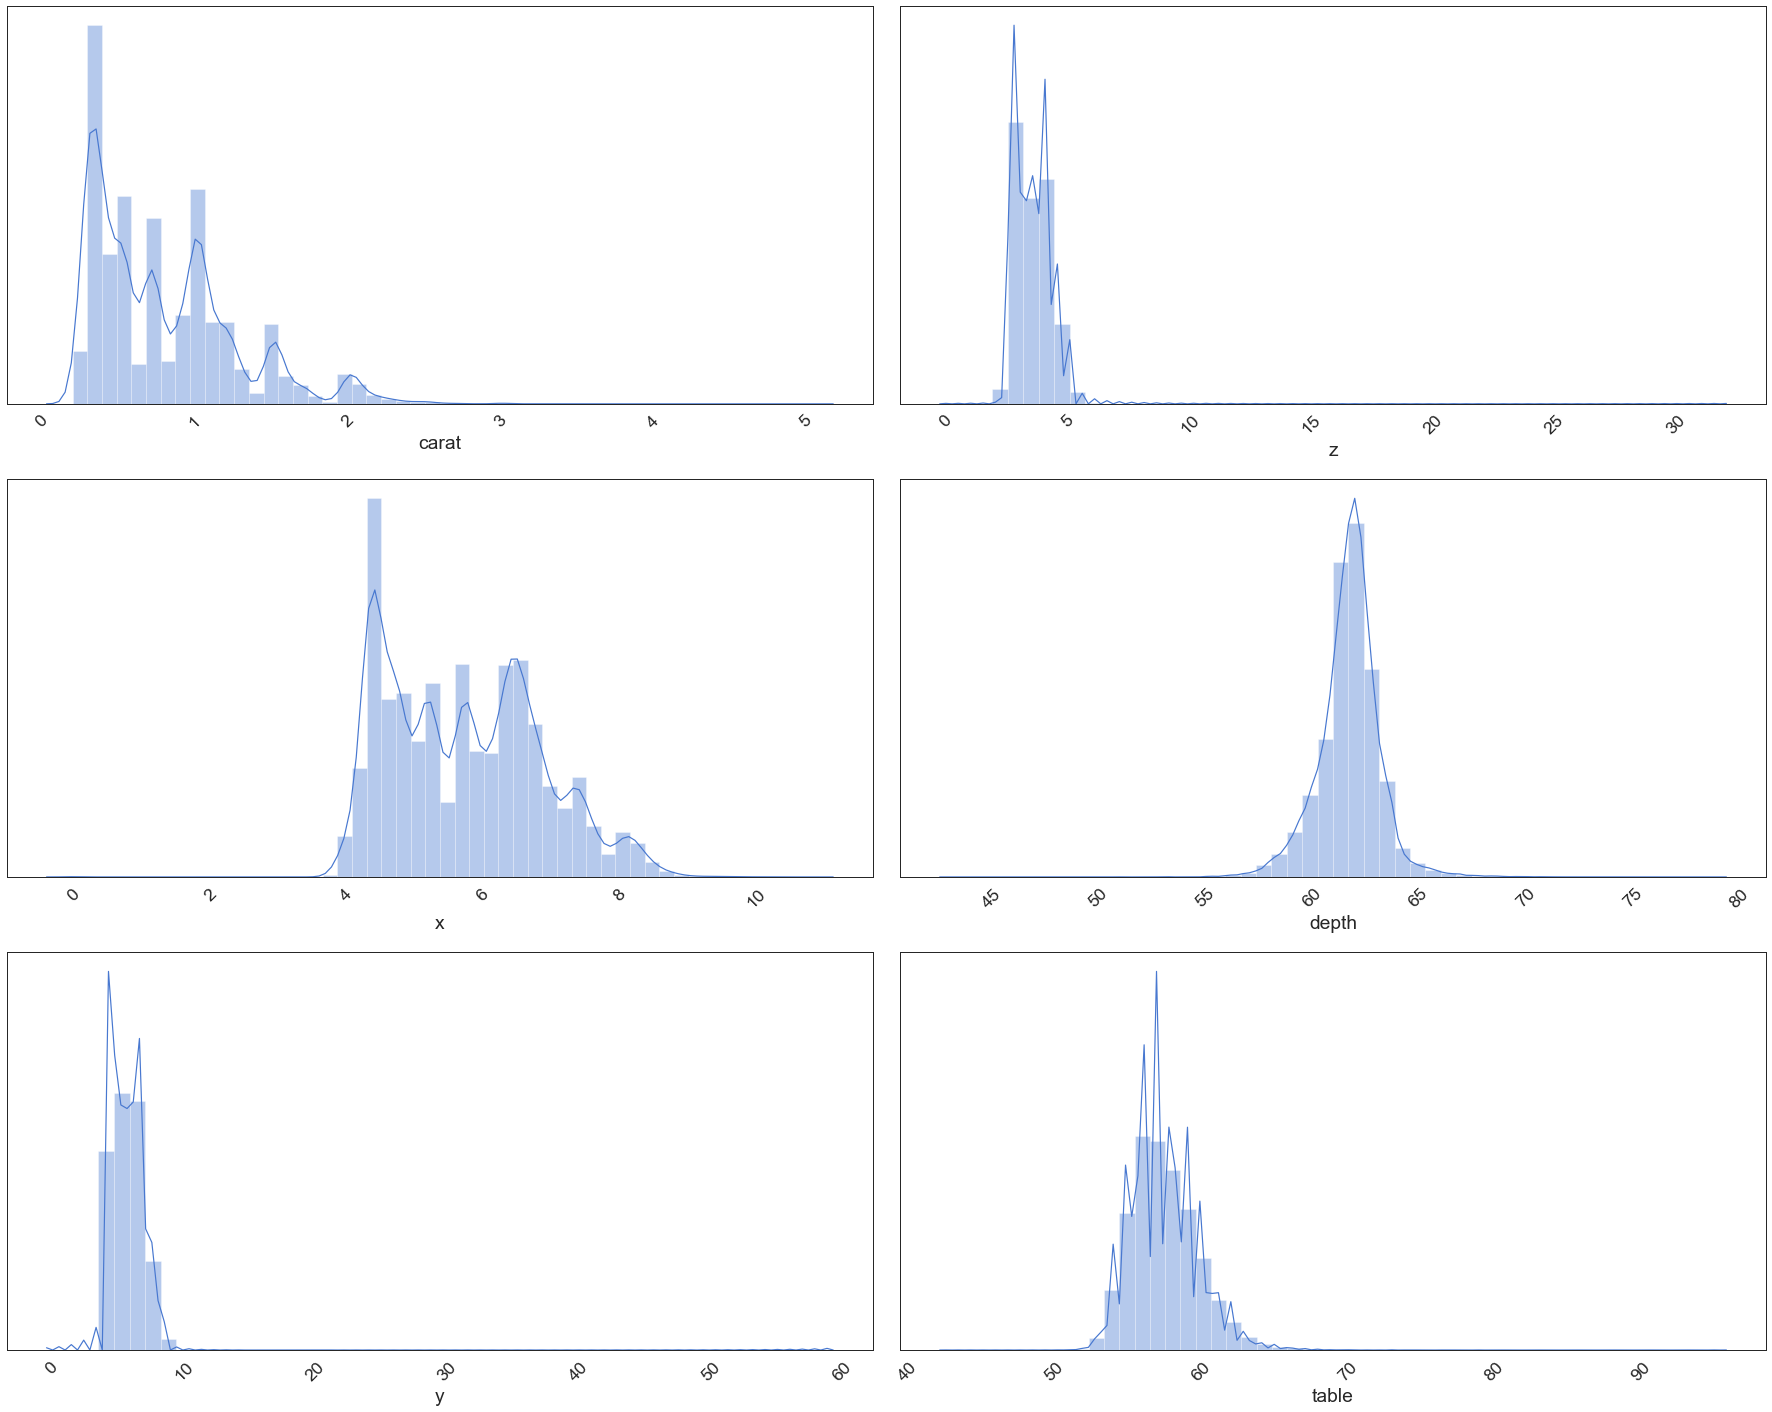

In [47]:
dist_subplots(3, 2, X, features)

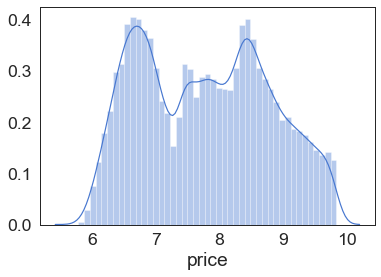

In [49]:
sns.distplot(np.log(df.price))

In [53]:
def mean_norm(col):
    mean = col.mean()
    mx = np.max(col)
    mn = np.min(col)
    norm = (col - mean)/(mx - mn)
    return norm

In [55]:
features = ['x', 'y', 'z', 'table', 'depth', 'carat']

In [57]:
for col in features:
    X[col] = mean_norm(X[col])

In [58]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,-0.118075,Ideal,E,SI2,-0.006928,-0.047254,-0.165843,-0.029788,-0.034866
2,-0.122233,Premium,E,SI1,-0.054150,0.068131,-0.171430,-0.032165,-0.038639
3,-0.118075,Good,E,VS1,-0.134706,0.145054,-0.156532,-0.028260,-0.038639
4,-0.105601,Premium,I,VS2,0.018072,0.010439,-0.142566,-0.025544,-0.028577
5,-0.101443,Good,J,SI2,0.043072,0.010439,-0.129530,-0.023506,-0.024803


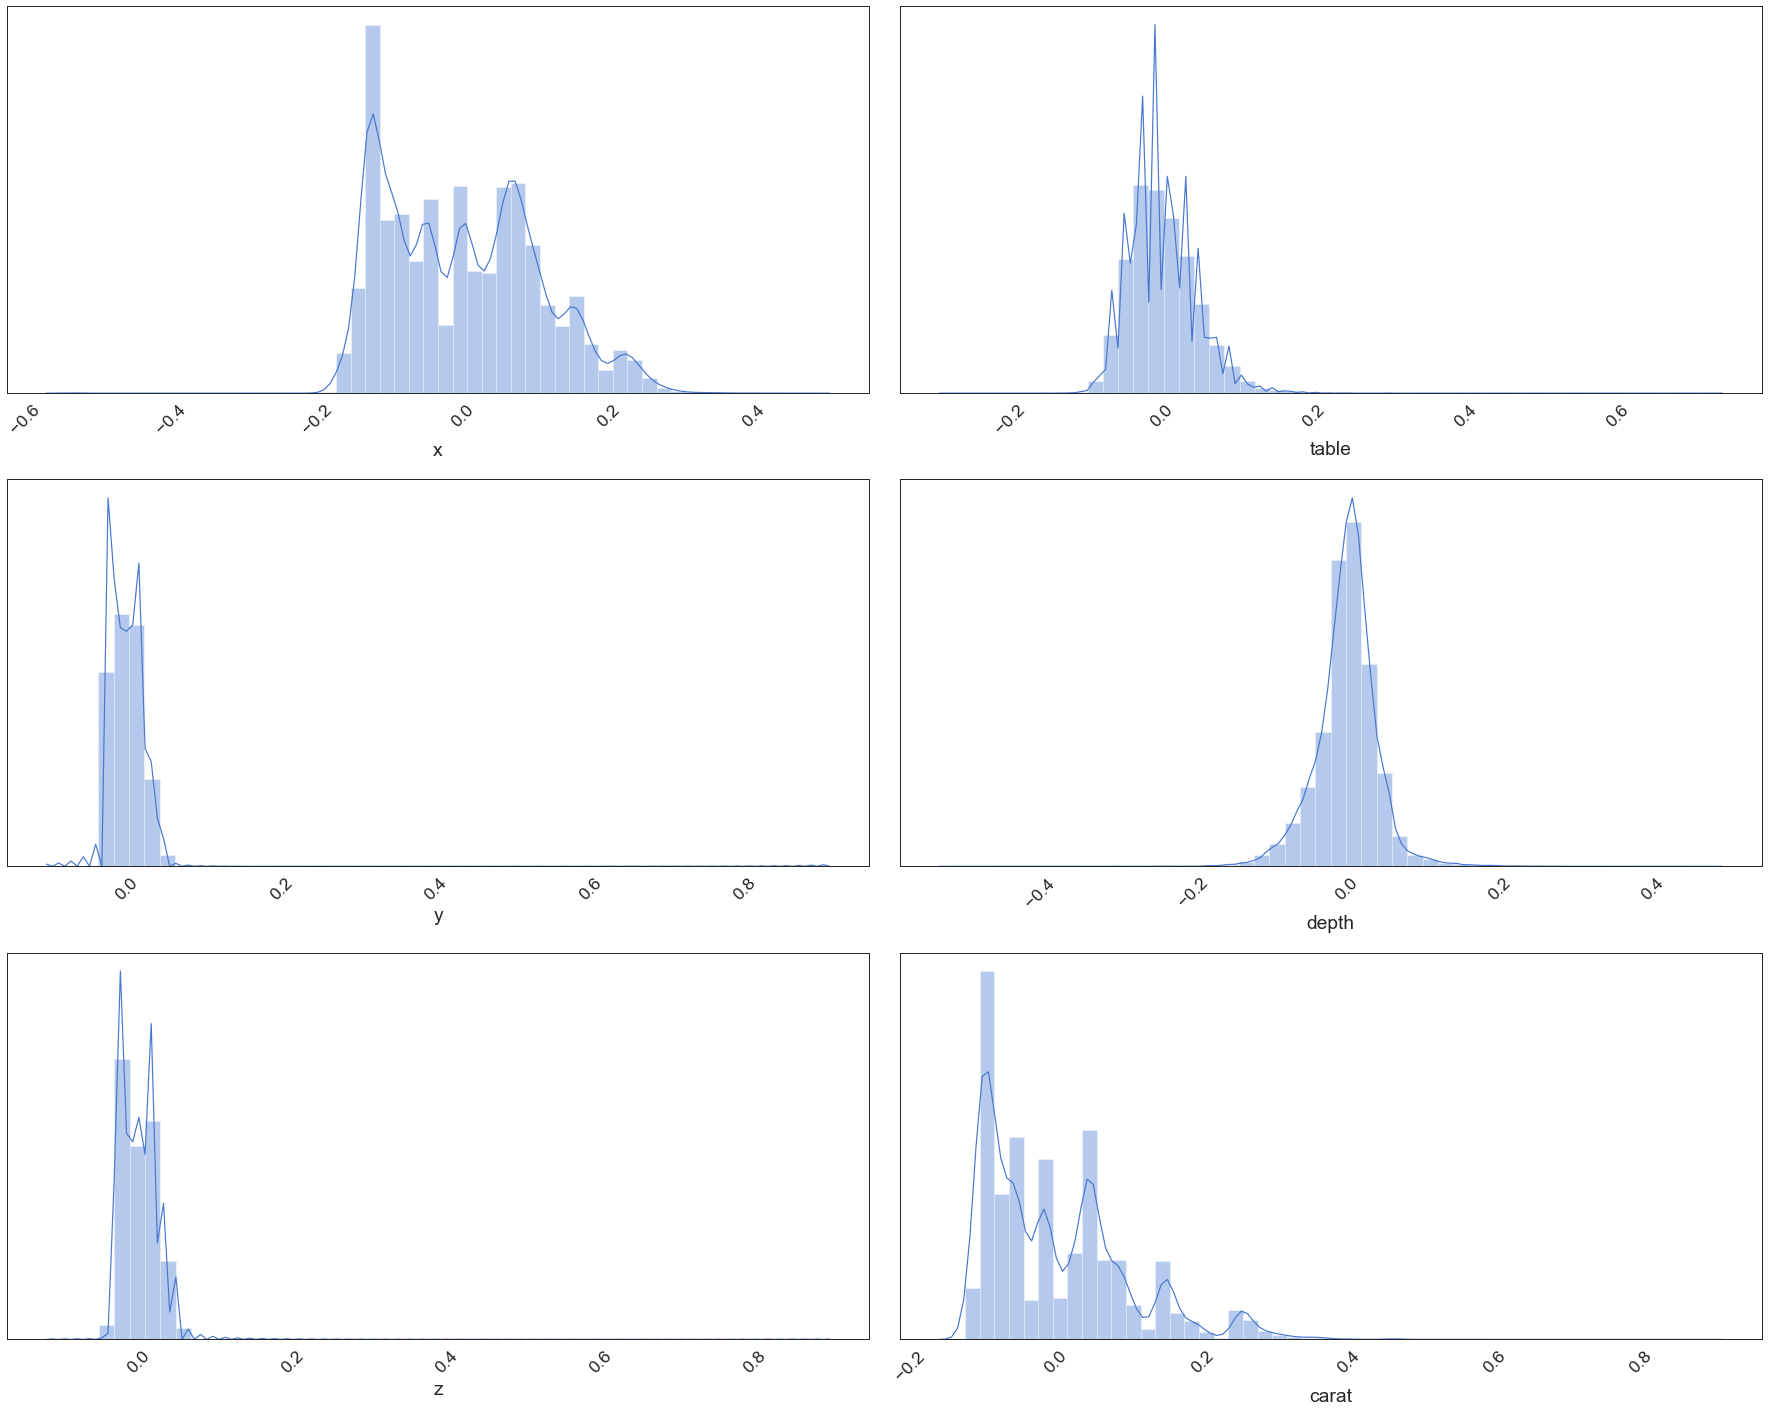

In [59]:
dist_subplots(3, 2, X, features)

In [60]:
import scipy.stats as stats

In [65]:
stats.normaltest(X['depth'])

NormaltestResult(statistic=6613.701779944519, pvalue=0.0)

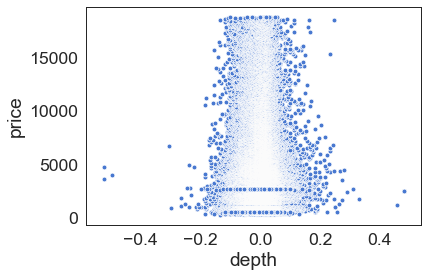

In [72]:
sns.scatterplot(x= X['depth'], y= y)